In [26]:
#Dependencies
import pandas as pd
import numpy as np
import requests
import time
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress, ttest_ind

# Load the .csv data file
path = "wildlife_dfm.csv"
animals_df = pd.read_csv(path)
# Drop unneccesary column
animals_df = animals_df.drop("Unnamed: 0", axis='columns')
# Change the name of the Description_x column
animals_df = animals_df.rename(columns={'Description_x': 'WeatherType'})
# Display first 5 records to ensure proper data load and format
animals_df.head()

,Date,Weathercode,Max Temperature,Min Temperature,Mean Temperature,Sunrise,Sunset,Total Precipitation,Total Rain,Total Snow,...,Species,Common.Name,Species.Diet,Number.of.Animals,Camera.Make,Camera.Model,Flash..Yes.or.No.,Bait.Used,Photos.per.trigger,Description_y
0,2018-05-06,2,69.9,40.4,56.0,06:19:00,20:27:00,0.0,0.0,0.0,...,Sapiens,Human non-staff,Omnivore,1,Bushnell,Agressor,No,None,3,NaN
1,2018-05-06,2,69.9,40.4,56.0,06:19:00,20:27:00,0.0,0.0,0.0,...,Sapiens,Human non-staff,Omnivore,2,Bushnell,Agressor,No,None,3,NaN
2,2018-05-06,2,69.9,40.4,56.0,06:19:00,20:27:00,0.0,0.0,0.0,...,Sapiens,Human non-staff,Omnivore,2,Bushnell,Agressor,No,None,3,NaN
3,2018-05-06,2,69.9,40.4,56.0,06:19:00,20:27:00,0.0,0.0,0.0,...,Lupus Familiaris,Domestic Dog,Carnivore,1,Bushnell,Agressor,No,None,3,NaN
4,2018-05-06,2,69.9,40.4,56.0,06:19:00,20:27:00,0.0,0.0,0.0,...,Sapiens,Human non-staff,Omnivore,2,Bushnell,Agressor,No,None,3,NaN


In [27]:
# Group the weather conditions
Sunny = ['Mainly Sunny', 'Sunny']
Rain = ['Light Drizzle', 'Drizzle', 'Light Rain', 'Heavy Drizzle', 'Rain']
Cloudy = ['Partly Cloudy', 'Cloudy']
Snow = ['Snow', 'Light Snow', 'Heavy Snow']

# Only include animals from the following Order
animal_order = ['Carnivora', 'Cetartiodactyla', 'Primates', 'Rodentia']
animals_df = animals_df[animals_df['Order'].isin(animal_order)]

# Exclude specific animals
exclusion = ['Domestic Dog', 'Domestic Cat', 'Domestic Horse', 'Domestic Cow']
animals_df = animals_df[~animals_df['Common.Name'].isin(exclusion)] 

# Group the data by both 'WeatherType' and animal 'Order'
grouped_data = animals_df.groupby(['WeatherType', 'Order'])

# Initialize a dictionary to store the counts for each weather type and animal order
weather_order_counts = {'Sunny': {}, 'Cloudy': {}, 'Rain': {}, 'Snow': {}}

# Loop through the groups and count animals in each weather type and animal order
for (weather, order), group in grouped_data:
    if weather in Sunny:
        weather_key = 'Sunny'
    elif weather in Cloudy:
        weather_key = 'Cloudy'
    elif weather in Rain:
        weather_key = 'Rain'
    elif weather in Snow:
        weather_key = 'Snow'
    else:
        continue

    if order in weather_order_counts[weather_key]:
        weather_order_counts[weather_key][order] += len(group)
    else:
        weather_order_counts[weather_key][order] = len(group)

# Display the counts for each weather type and animal order
for weather, order_counts in weather_order_counts.items():
    print(f"Weather Type: {weather}")
    for order, count in order_counts.items():
        print(f"{order}: {count}")
    print()


Weather Type: Sunny
Carnivora: 5583
Cetartiodactyla: 5390
Primates: 22136
Rodentia: 942

Weather Type: Cloudy
Carnivora: 1861
Cetartiodactyla: 2308
Primates: 6031
Rodentia: 373

Weather Type: Rain
Carnivora: 3005
Cetartiodactyla: 4520
Primates: 22479
Rodentia: 673

Weather Type: Snow
Carnivora: 598
Cetartiodactyla: 798
Primates: 1368
Rodentia: 85



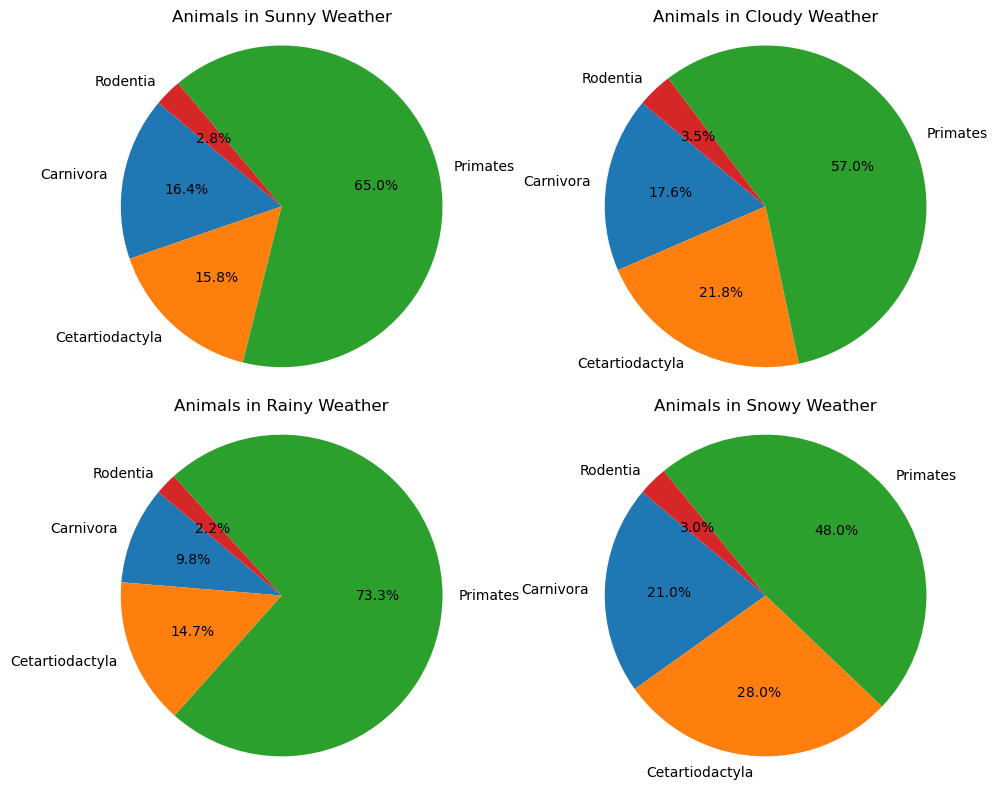

In [28]:
# Prepare the data for each weather type
sunny_data = pd.Series(weather_order_counts['Sunny'], name='Counts')
cloudy_data = pd.Series(weather_order_counts['Cloudy'], name='Counts')
rain_data = pd.Series(weather_order_counts['Rain'], name='Counts')
snow_data = pd.Series(weather_order_counts['Snow'], name='Counts')

# Create a single figure
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot the pie charts for each weather type
def plot_pie_chart(ax, data, title):
    labels = data.index
    sizes = data.values
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.axis('equal')
    ax.set_title(title)

plot_pie_chart(axes[0, 0], sunny_data, 'Animals in Sunny Weather')
plot_pie_chart(axes[0, 1], cloudy_data, 'Animals in Cloudy Weather')
plot_pie_chart(axes[1, 0], rain_data, 'Animals in Rainy Weather')
plot_pie_chart(axes[1, 1], snow_data, 'Animals in Snowy Weather')

plt.tight_layout()
plt.show()

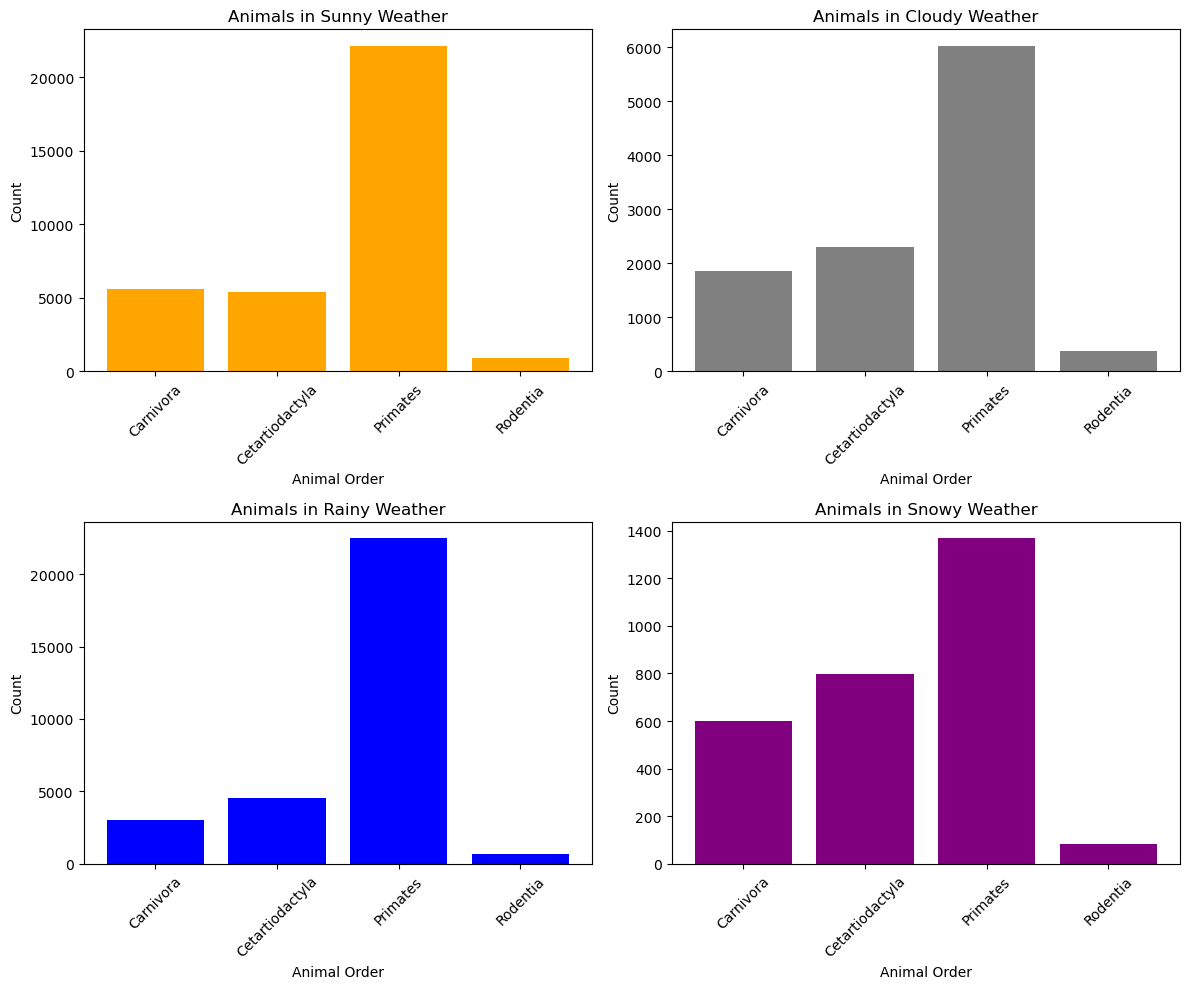

In [29]:
# Create dataframes for each weather type
sunny_df = pd.DataFrame.from_dict(weather_order_counts['Sunny'], orient='index', columns=['Count'])
cloudy_df = pd.DataFrame.from_dict(weather_order_counts['Cloudy'], orient='index', columns=['Count'])
rain_df = pd.DataFrame.from_dict(weather_order_counts['Rain'], orient='index', columns=['Count'])
snow_df = pd.DataFrame.from_dict(weather_order_counts['Snow'], orient='index', columns=['Count'])

# Create a single figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Create bar chart for Sunny weather
axes[0, 0].bar(sunny_df.index, sunny_df['Count'], color='orange')
axes[0, 0].set_xlabel('Animal Order')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Animals in Sunny Weather')
axes[0, 0].tick_params(axis='x', rotation=45)

# Create bar chart for Cloudy weather
axes[0, 1].bar(cloudy_df.index, cloudy_df['Count'], color='gray')
axes[0, 1].set_xlabel('Animal Order')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Animals in Cloudy Weather')
axes[0, 1].tick_params(axis='x', rotation=45)

# Create bar chart for Rainy weather
axes[1, 0].bar(rain_df.index, rain_df['Count'], color='blue')
axes[1, 0].set_xlabel('Animal Order')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Animals in Rainy Weather')
axes[1, 0].tick_params(axis='x', rotation=45)

# Create bar chart for Snowy weather
axes[1, 1].bar(snow_df.index, snow_df['Count'], color='purple')
axes[1, 1].set_xlabel('Animal Order')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Animals in Snowy Weather')
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [ ]:
#These charts did not show any correlated data and were not used in the presentation or for further analysis

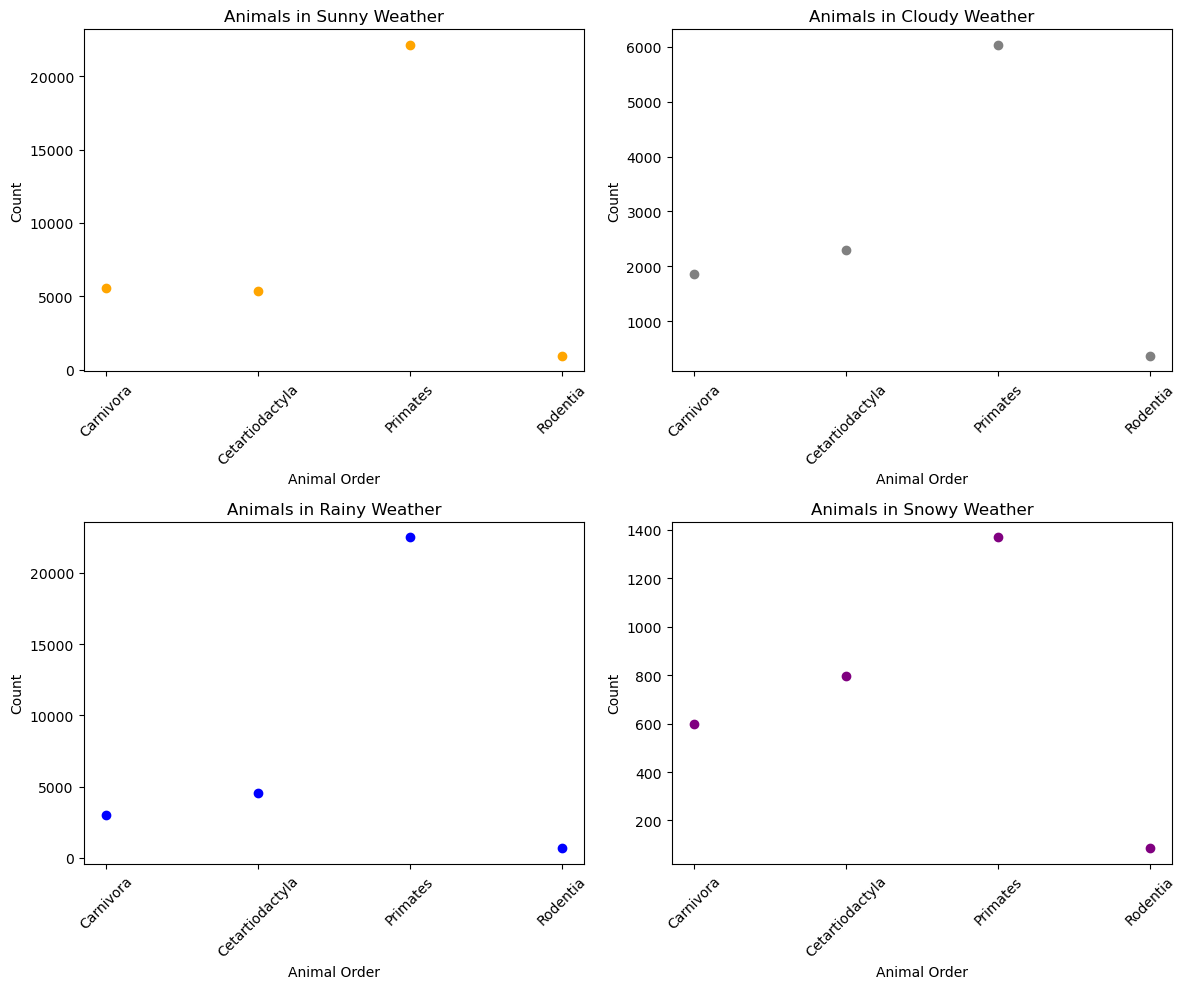

T-test between Sunny and Cloudy:
T-statistic: 1.2181524645780297
P-value: 0.2688893414465953
Fail to reject null hypothesis. There is no significant difference in mean animal counts.

T-test between Sunny and Rain:
T-statistic: 0.12334439754996088
P-value: 0.9058624661124534
Fail to reject null hypothesis. There is no significant difference in mean animal counts.

T-test between Sunny and Snow:
T-statistic: 1.6691272592991593
P-value: 0.14613304828808144
Fail to reject null hypothesis. There is no significant difference in mean animal counts.

T-test between Cloudy and Rain:
T-statistic: -0.977406125137521
P-value: 0.36611512824406456
Fail to reject null hypothesis. There is no significant difference in mean animal counts.

T-test between Cloudy and Snow:
T-statistic: 1.5680089732036626
P-value: 0.16792578238149114
Fail to reject null hypothesis. There is no significant difference in mean animal counts.

T-test between Rain and Snow:
T-statistic: 1.3895645102062901
P-value: 0.214030651

In [23]:
# Create dataframes for each weather type
sunny_df = pd.DataFrame.from_dict(weather_order_counts['Sunny'], orient='index', columns=['Count'])
cloudy_df = pd.DataFrame.from_dict(weather_order_counts['Cloudy'], orient='index', columns=['Count'])
rain_df = pd.DataFrame.from_dict(weather_order_counts['Rain'], orient='index', columns=['Count'])
snow_df = pd.DataFrame.from_dict(weather_order_counts['Snow'], orient='index', columns=['Count'])

# Create a single figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Create scatter plot for Sunny weather
axes[0, 0].scatter(sunny_df.index, sunny_df['Count'], color='orange')
axes[0, 0].set_xlabel('Animal Order')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Animals in Sunny Weather')
axes[0, 0].tick_params(axis='x', rotation=45)

# Create scatter plot for Cloudy weather
axes[0, 1].scatter(cloudy_df.index, cloudy_df['Count'], color='gray')
axes[0, 1].set_xlabel('Animal Order')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Animals in Cloudy Weather')
axes[0, 1].tick_params(axis='x', rotation=45)

# Create scatter plot for Rainy weather
axes[1, 0].scatter(rain_df.index, rain_df['Count'], color='blue')
axes[1, 0].set_xlabel('Animal Order')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Animals in Rainy Weather')
axes[1, 0].tick_params(axis='x', rotation=45)

# Create scatter plot for Snowy weather
axes[1, 1].scatter(snow_df.index, snow_df['Count'], color='purple')
axes[1, 1].set_xlabel('Animal Order')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Animals in Snowy Weather')
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Null hypothesis: There is no significant difference in the mean animal counts between different weather types.

# Convert counts data into DataFrames
sunny_data = pd.DataFrame.from_dict(weather_order_counts['Sunny'], orient='index', columns=['Count'])
cloudy_data = pd.DataFrame.from_dict(weather_order_counts['Cloudy'], orient='index', columns=['Count'])
rain_data = pd.DataFrame.from_dict(weather_order_counts['Rain'], orient='index', columns=['Count'])
snow_data = pd.DataFrame.from_dict(weather_order_counts['Snow'], orient='index', columns=['Count'])

# Conduct t-test for each pair of weather types
weather_dfs = [sunny_data, cloudy_data, rain_data, snow_data]
for i in range(len(weather_dfs)):
    for j in range(i + 1, len(weather_dfs)):
        weather1 = weather_types[i]
        weather2 = weather_types[j]
        t_stat, p_value = ttest_ind(weather_dfs[i]['Count'], weather_dfs[j]['Count'])
        print(f"T-test between {weather1} and {weather2}:")
        print(f"T-statistic: {t_stat}")
        print(f"P-value: {p_value}")
        if p_value < 0.05:
            print("Reject null hypothesis. There is a significant difference in mean animal counts.")
        else:
            print("Fail to reject null hypothesis. There is no significant difference in mean animal counts.")
        print()

# Calculate R-squared (R2) value for the regression of animal counts on weather type
weather_type_labels = []
count_values = []
for weather_type, order_counts in weather_order_counts.items():
    for order, count in order_counts.items():
        weather_type_labels.append(weather_type)
        count_values.append(count)

slope, intercept, r_value, p_value, std_err = linregress(pd.Categorical(weather_type_labels).codes, count_values)
r_squared = r_value ** 2

print(f"R-squared value: {r_squared}")

In [ ]:
#In this case the data was not significant enough to persue further. The original data was modified to use individual
#animals instead of grouping them by Order. Work continued in next file. Animals_Weather_Conditions
#some data from this slide was updated to page 13 of the presentation